In [5]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [6]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [7]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 50
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.QIS.value()

In [8]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [9]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [09:12<00:00,  1.95s/it]


StrategyStatistics:
* final_nav = 9.396635
* geom_avg_total_r = 0.125057
* geom_avg_xs_r = 0.117278
* std_xs_r = 0.145926
* min_xs_r = -0.090966
* max_xs_r = 0.099432
* skew = -0.022274
* kurtosis = 15.740555
* max_dd = -0.274898
* sharpe = 0.803681
* alpha_buy_hold = 0.047485
* tracking_error_buy_hold = 0.168236
* ir_buy_hold = 0.282255
* factor_loadings = {'low_risk': 0.6226360977518499, 'momentum': -0.11335714029102548, 'quality': 0.07547968388492776, 'size': 0.04529143964573147, 'value': -0.26770205042658546, 'spx': 0.6644945503839446}
* alpha_benchmark = 0.056864
* alpha_benchmark_pvalue = 0.013681
* tracking_error_benchmark = 0.100212
* ir_benchmark = 0.567433
* ttest_pval = 0.304004
* levene_pval = 0.000000
* timing_ability_coef = -0.034872
* timing_ability_pval = 0.056005

In [10]:
result.std_xs_r, result.sharpe

(0.14592645801005902, 0.8036814274545381)

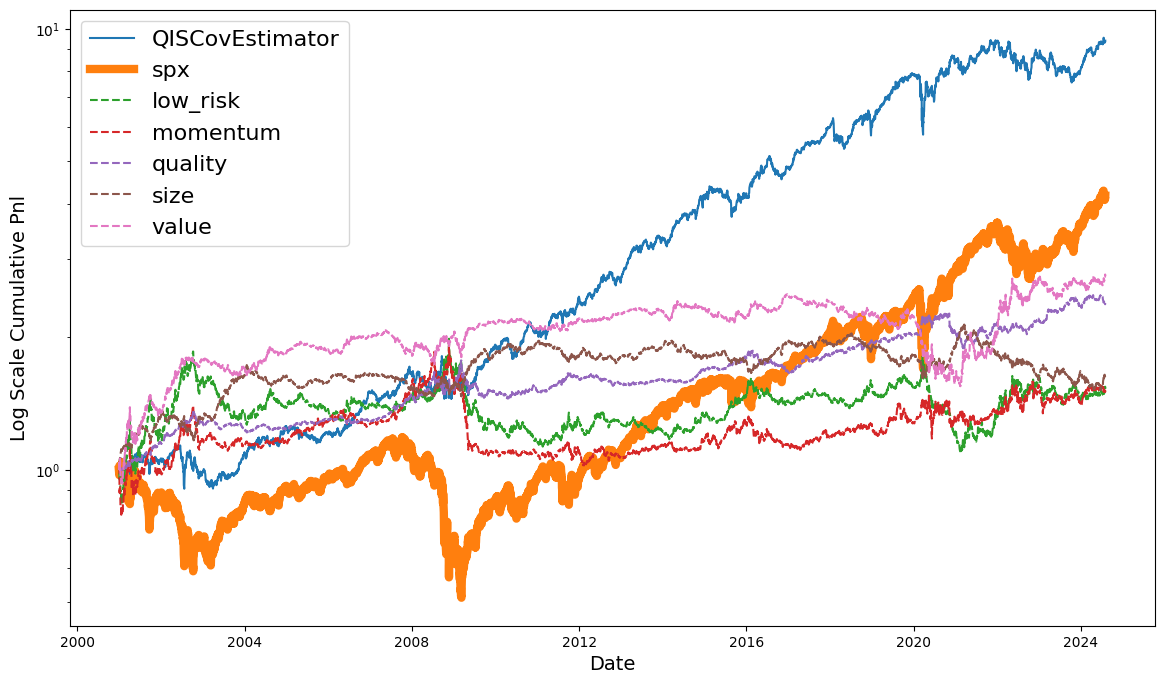

In [11]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

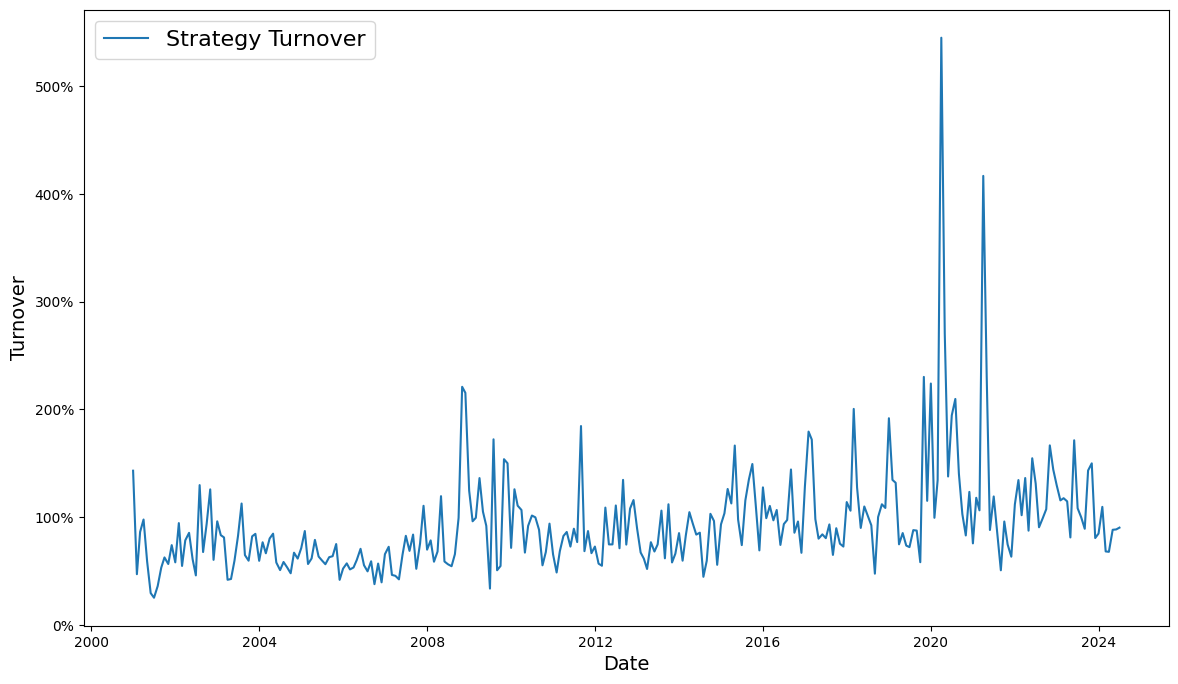

In [12]:
runner.plot_turnover()

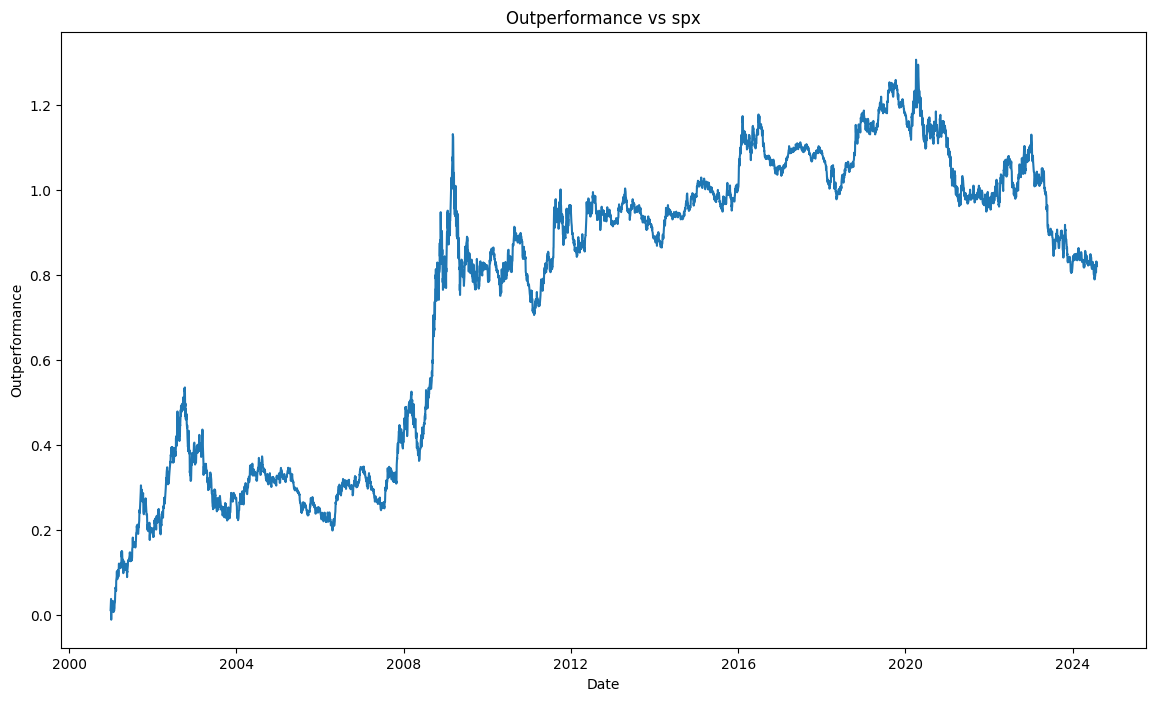

In [13]:
runner.plot_outperformance(mkt_only=True)

In [14]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")